In [643]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

# 파일
pop=pd.read_csv('./인구__가구_및_주택__읍면동_2015_2020___시군구_20162019__20220705200414.csv',header=1) 
cin=pd.read_csv('./KOBIS_지역별 영화상영관현황_2022-07-05.csv',header=None, na_filter=False)
movie21=pd.read_csv('./KOBIS_지역별_점유율_2021.csv',header=None)
movie19=pd.read_csv('./KOBIS_지역별_점유율_2019.csv',header=None)
# 출처 : KOSIS국가통계포털, KOBIS영화관입장권통합전산망

In [644]:
# Matplotlib 한글 Fonts 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='./Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 영화상영관 데이터 전처리

In [645]:
cin.info()
cin.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       23 non-null     object
 1   1       23 non-null     object
 2   2       23 non-null     object
 3   3       23 non-null     object
 4   4       23 non-null     object
 5   5       23 non-null     object
 6   6       23 non-null     object
 7   7       23 non-null     object
 8   8       23 non-null     object
dtypes: object(9)
memory usage: 1.7+ KB


,0,1,2,3,4,5,6,7,8
0,■ 지역별 영화상영관현황,,,,,,,,
1,- 조회일: 2022-07-05,,,,,,,,
2,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),,,,,,,,
3,지역,영화상영관수,스크린수,좌석수,상영타입,,,,
4,,,,,일반(필름),Digital 2D,Digital 3D,Digital 4D,Digital IMAX
5,서울시,99,608,"99,959",17,602,232,17,3
6,경기도,152,871,"121,541",4,862,241,11,6
7,강원도,30,131,"16,680",2,130,39,0,1
8,충청북도,22,127,"17,174",0,127,26,2,0
9,충청남도,32,148,"18,048",1,146,43,2,0


In [646]:
# 필요없는 행 지우고 인덱스 재설정
cin=cin.iloc[3:,:].reset_index().drop('index',axis=1).T
cin

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,지역,,서울시,경기도,강원도,충청북도,충청남도,경상북도,경상남도,전라북도,전라남도,제주도,부산시,대구시,대전시,울산시,인천시,광주시,세종시,합계
1,영화상영관수,,99,152,30,22,32,34,38,29,24,6,35,25,18,11,27,19,5,606
2,스크린수,,608,871,131,127,148,158,192,139,103,33,235,152,109,61,165,135,25,"3,392"
3,좌석수,,"99,959","121,541","16,680","17,174","18,048","19,743","25,383","19,396","14,342","3,584","38,653","22,655","18,103","10,435","25,141","20,233","3,404","494,474"
4,상영타입,일반(필름),17,4,2,0,1,0,0,1,0,0,8,1,2,2,1,2,0,41
5,,Digital 2D,602,862,130,127,146,158,192,139,102,33,235,152,109,61,165,135,25,"3,373"
6,,Digital 3D,232,241,39,26,43,40,52,46,33,8,80,52,33,23,47,35,5,"1,035"
7,,Digital 4D,17,11,0,2,2,0,2,1,0,1,4,1,2,2,2,3,0,50
8,,Digital IMAX,3,6,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,17


In [647]:
# 필요없는 셀 지우기
cin[0]=cin[0].drop(4)
cin[0]=cin[0].fillna('')
cin

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,지역,,서울시,경기도,강원도,충청북도,충청남도,경상북도,경상남도,전라북도,전라남도,제주도,부산시,대구시,대전시,울산시,인천시,광주시,세종시,합계
1,영화상영관수,,99,152,30,22,32,34,38,29,24,6,35,25,18,11,27,19,5,606
2,스크린수,,608,871,131,127,148,158,192,139,103,33,235,152,109,61,165,135,25,"3,392"
3,좌석수,,"99,959","121,541","16,680","17,174","18,048","19,743","25,383","19,396","14,342","3,584","38,653","22,655","18,103","10,435","25,141","20,233","3,404","494,474"
4,,일반(필름),17,4,2,0,1,0,0,1,0,0,8,1,2,2,1,2,0,41
5,,Digital 2D,602,862,130,127,146,158,192,139,102,33,235,152,109,61,165,135,25,"3,373"
6,,Digital 3D,232,241,39,26,43,40,52,46,33,8,80,52,33,23,47,35,5,"1,035"
7,,Digital 4D,17,11,0,2,2,0,2,1,0,1,4,1,2,2,2,3,0,50
8,,Digital IMAX,3,6,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,17


In [648]:
# 0열과 1열 합쳐서 인덱스로 설정
cin[""]=cin[0].add(cin[1])
cin=cin.set_index("").drop([0,1],axis=1)
cin.T

,지역,영화상영관수,스크린수,좌석수,일반(필름),Digital 2D,Digital 3D,Digital 4D,Digital IMAX
2,서울시,99,608,"99,959",17,602,232,17,3
3,경기도,152,871,"121,541",4,862,241,11,6
4,강원도,30,131,"16,680",2,130,39,0,1
5,충청북도,22,127,"17,174",0,127,26,2,0
6,충청남도,32,148,"18,048",1,146,43,2,0
7,경상북도,34,158,"19,743",0,158,40,0,0
8,경상남도,38,192,"25,383",0,192,52,2,1
9,전라북도,29,139,"19,396",1,139,46,1,1
10,전라남도,24,103,"14,342",0,102,33,0,0
11,제주도,6,33,"3,584",0,33,8,1,0


In [649]:
# 서울시, 대구시만 출력
cin=cin.T.set_index('지역')
cin_sd=cin.loc[['서울시','대구시']]
cin_sd

,영화상영관수,스크린수,좌석수,일반(필름),Digital 2D,Digital 3D,Digital 4D,Digital IMAX
지역,,,,,,,,
서울시,99,608,"99,959",17,602,232,17,3
대구시,25,152,"22,655",1,152,52,1,0


In [650]:
# 데이터 정수로 변환
cin_s=[]
for i in cin_sd.iloc[0]:
    i=i.replace(',','')
    cin_s+=[int(i)]
cin_sd.loc['서울시']=cin_s

cin_d=[]
for i in cin_sd.iloc[1]:
    i=i.replace(',','')
    cin_d+=[int(i)]
cin_sd.loc['대구시']=cin_d

# 서울시, 대구시 영화상영관 현황

In [651]:
cin_sd

,영화상영관수,스크린수,좌석수,일반(필름),Digital 2D,Digital 3D,Digital 4D,Digital IMAX
지역,,,,,,,,
서울시,99,608,99959,17,602,232,17,3
대구시,25,152,22655,1,152,52,1,0


#### 

# 인구 데이터 전처리

In [652]:
pop.info()
pop.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   행정구역별(읍면동)       324 non-null    object
 1   총인구 (명)          324 non-null    object
 2   남자 (명)           324 non-null    object
 3   여자 (명)           324 non-null    object
 4   내국인-계 (명)        324 non-null    object
 5   내국인-남자 (명)       324 non-null    object
 6   내국인-여자 (명)       324 non-null    object
 7   외국인-계 (명)        324 non-null    object
 8   외국인-남자 (명)       324 non-null    object
 9   외국인-여자 (명)       324 non-null    object
 10  가구-계 (가구)        324 non-null    object
 11  일반가구 (가구)        324 non-null    object
 12  집단가구 (가구)        324 non-null    object
 13  외국인가구 (가구)       324 non-null    object
 14  주택-계 (호)         324 non-null    object
 15  단독주택 (호)         324 non-null    object
 16  아파트 (호)          324 non-null    object
 17  연립주택 (호)         324 non-null    ob

,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
0,전국,"51,829,136","25,915,207","25,913,929","50,133,493","24,972,588","25,160,905","1,695,643","942,619","753,024",...,"20,926,710","16,388","541,687","18,525,844","3,897,729","11,661,851","521,606","2,230,787","213,871","1,000,903"
1,읍부,"5,113,052","2,624,351","2,488,701","4,904,647","2,494,271","2,410,376","208,405","130,080","78,325",...,"2,021,664","2,353","56,367","1,992,568","579,820","1,142,894","79,981","159,041","30,832","74,804"
2,면부,"4,650,781","2,420,392","2,230,389","4,394,145","2,237,761","2,156,384","256,636","182,631","74,005",...,"2,008,345","4,237","56,296","2,105,345","1,539,804","427,449","36,565","69,672","31,855","103,889"
3,동부,"42,065,303","20,870,464","21,194,839","40,834,701","20,240,556","20,594,145","1,230,602","629,908","600,694",...,"16,896,701","9,798","429,024","14,427,931","1,778,105","10,091,508","405,060","2,002,074","151,184","822,210"
4,서울특별시,"9,586,195","4,647,733","4,938,462","9,219,741","4,474,343","4,745,398","366,454","173,390","193,064",...,"3,982,290","2,264","141,970","3,015,371","307,075","1,772,670","110,562","796,066","28,998","248,125"
5,종로구,"151,291","73,062","78,229","139,718","67,919","71,799","11,573","5,143","6,430",...,"63,414",115,"4,540","46,859","12,259","15,688","5,460","12,540",912,"5,663"
6,중구,"128,744","62,147","66,597","117,252","56,725","60,527","11,492","5,422","6,070",...,"55,093",96,"4,628","42,234","5,967","26,102","1,944","7,352",869,"5,695"
7,용산구,"225,882","109,162","116,720","208,602","99,866","108,736","17,280","9,296","7,984",...,"95,714",89,"5,628","74,542","14,064","37,676","3,969","18,124",709,"6,611"
8,성동구,"291,918","142,128","149,790","281,266","137,301","143,965","10,652","4,827","5,825",...,"122,186",69,"4,403","91,329","10,525","67,584","1,990","10,158","1,072","6,092"
9,광진구,"353,967","169,925","184,042","333,985","161,130","172,855","19,982","8,795","11,187",...,"152,090",78,"8,776","89,832","15,332","32,135","4,054","36,858","1,453","8,065"


In [653]:
# 인덱스 설정
pop=pop.set_index('행정구역별(읍면동)')
pop

,총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),가구-계 (가구),일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
행정구역별(읍면동),,,,,,,,,,,,,,,,,,,,
전국,"51,829,136","25,915,207","25,913,929","50,133,493","24,972,588","25,160,905","1,695,643","942,619","753,024","21,484,785","20,926,710","16,388","541,687","18,525,844","3,897,729","11,661,851","521,606","2,230,787","213,871","1,000,903"
읍부,"5,113,052","2,624,351","2,488,701","4,904,647","2,494,271","2,410,376","208,405","130,080","78,325","2,080,384","2,021,664","2,353","56,367","1,992,568","579,820","1,142,894","79,981","159,041","30,832","74,804"
면부,"4,650,781","2,420,392","2,230,389","4,394,145","2,237,761","2,156,384","256,636","182,631","74,005","2,068,878","2,008,345","4,237","56,296","2,105,345","1,539,804","427,449","36,565","69,672","31,855","103,889"
동부,"42,065,303","20,870,464","21,194,839","40,834,701","20,240,556","20,594,145","1,230,602","629,908","600,694","17,335,523","16,896,701","9,798","429,024","14,427,931","1,778,105","10,091,508","405,060","2,002,074","151,184","822,210"
서울특별시,"9,586,195","4,647,733","4,938,462","9,219,741","4,474,343","4,745,398","366,454","173,390","193,064","4,126,524","3,982,290","2,264","141,970","3,015,371","307,075","1,772,670","110,562","796,066","28,998","248,125"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
읍부,"153,767","79,230","74,537","143,607","72,697","70,910","10,160","6,533","3,627","62,301","60,060",78,"2,163","62,136","41,490","5,000","8,417","5,482","1,747","3,482"
면부,"35,539","18,365","17,174","33,603","17,103","16,500","1,936","1,262",674,"15,497","14,992",18,487,"15,778","12,618",504,"1,148","1,048",460,869
동부,"481,552","240,578","240,974","466,817","233,204","233,613","14,735","7,374","7,361","192,637","188,016",114,"4,507","168,537","41,771","72,632","21,080","29,345","3,709","13,782"


In [654]:
# 서울시, 대구시만 추출
pop_sd=pop.loc[['서울특별시','대구광역시']]
pop_sd

,총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),가구-계 (가구),일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
행정구역별(읍면동),,,,,,,,,,,,,,,,,,,,
서울특별시,"9,586,195","4,647,733","4,938,462","9,219,741","4,474,343","4,745,398","366,454","173,390","193,064","4,126,524","3,982,290","2,264","141,970","3,015,371","307,075","1,772,670","110,562","796,066","28,998","248,125"
대구광역시,"2,410,700","1,190,271","1,220,429","2,373,302","1,170,625","1,202,677","37,398","19,646","17,752","997,416","985,816",512,"11,088","809,802","142,457","595,392","9,093","52,492","10,368","22,788"


In [655]:
# 데이터 정수로 변환
pop_s=[]
for i in pop_sd.iloc[0]:
    i=i.replace(',','')
    pop_s+=[int(i)]
pop_sd.loc['서울특별시']=pop_s

pop_d=[]
for i in pop_sd.iloc[1]:
    i=i.replace(',','')
    pop_d+=[int(i)]
pop_sd.loc['대구광역시']=pop_d

# 서울시, 대구시 인구 현황

In [656]:
pop_sd

,총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),가구-계 (가구),일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
행정구역별(읍면동),,,,,,,,,,,,,,,,,,,,
서울특별시,9586195,4647733,4938462,9219741,4474343,4745398,366454,173390,193064,4126524,3982290,2264,141970,3015371,307075,1772670,110562,796066,28998,248125
대구광역시,2410700,1190271,1220429,2373302,1170625,1202677,37398,19646,17752,997416,985816,512,11088,809802,142457,595392,9093,52492,10368,22788


# 변수 설정

In [657]:
# 서울 인구 십만명당 영화상영관 수
sc=round(cin_sd.iloc[0,0]/(pop_sd.iloc[0,0]/100000),3)

# 서울 인구 십만명당 특별상영관 수
counts=0
for i in cin_sd.iloc[0][5:8]:
    counts+=i
ss=round(counts/(pop_sd.iloc[0,0]/100000),3)

# 대구 인구 십만명당 영화상영관 수
dc=round(cin_sd.iloc[1,0]/(pop_sd.iloc[1,0]/100000),3)

# 대구 인구 십만명당 특별상영관 수
countd=0
for i in cin_sd.iloc[1][5:8]:
    countd+=i
ds=round(countd/(pop_sd.iloc[1,0]/100000),3)

# 그래프 그리기

### 영화상영관, 특별상영관 수

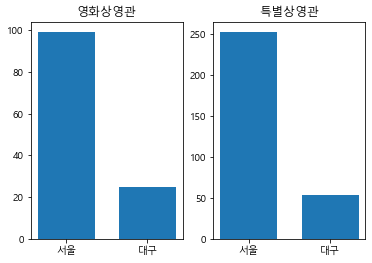

In [658]:
fig1=plt.figure()

# 영화 상영관 수
ax1=fig1.add_subplot(121)
ax1.set_title('영화상영관')
ax1=plt.bar(['서울','대구'], [cin_sd.iloc[0,0],cin_sd.iloc[1,0]], width=0.7)

# 특별 상영관 수
ax2=fig1.add_subplot(122)
ax2.set_title('특별상영관')
ax2=plt.bar(['서울','대구'],[counts,countd],width=0.7)

### 인구 수

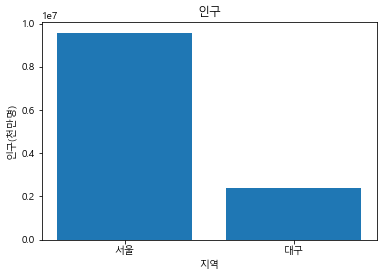

In [659]:
plt.bar(['서울','대구'],[pop_sd.iloc[0,0],pop_sd.iloc[1,0]])
plt.ylabel('인구(천만명)')                          
plt.xlabel('지역')                              
plt.title('인구')                      
plt.show()

### 십만명당 영화상영관, 특별상영관 수

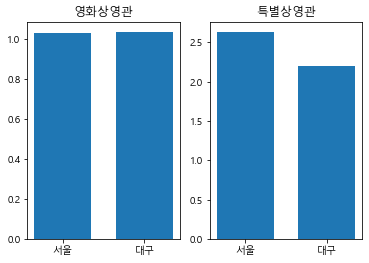

In [660]:
fig2=plt.figure()

# 영화 상영관 수
ax3=fig2.add_subplot(121)
ax3.set_title('영화상영관')
ax3=plt.bar(['서울','대구'], [sc,dc], width=0.7)

# 특별 상영관 수
ax4=fig2.add_subplot(122)
ax4.set_title('특별상영관')
ax4=plt.bar(['서울','대구'], [ss,ds],width=0.7)

# 결론1

 - 일반영화상영관/특별상영관 모두 대구에 비해 서울이 4~5배 많았다.
 
 - 인구역시 서울이 대구에 비해 많았다.
 
 - 인구 십만명 대비 일반영화상영관은 오히려 대구가 아주 근소한 차이로 많았다.
 
 - 인구 십만명 대비 특별상영관은 서울이 근소한 차이로 많았다.
 
 
 ### - 서울과 대구의 상영관 수는 유의미한 차이를 보이지 않았다.

# 점유율 데이터 전처리

In [661]:
# 2021년
movie21.info()
movie21.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       23 non-null     object
 1   1       20 non-null     object
 2   2       19 non-null     object
 3   3       19 non-null     object
 4   4       19 non-null     object
 5   5       20 non-null     object
 6   6       19 non-null     object
 7   7       19 non-null     object
 8   8       19 non-null     object
 9   9       20 non-null     object
 10  10      19 non-null     object
 11  11      19 non-null     object
 12  12      19 non-null     object
dtypes: object(13)
memory usage: 2.6+ KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,■ 지역별 점유율,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,- 조회일: 2022-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,▶ 검색조건 [ 조회기간 : 2021-01-01~2021-12-31 ],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,지역,한국영화,NaN,NaN,NaN,외국영화,NaN,NaN,NaN,전체,NaN,NaN,NaN
5,NaN,상영편수,매출액,관객수,점유율,상영편수,매출액,관객수,점유율,상영편수,매출액,관객수,점유율
6,서울시,643,"42,994,810,463","4,606,715",25.3%,"1,141","122,295,359,980","12,326,416",29.1%,"1,784","165,290,170,443","16,933,131",28.0%
7,경기도,322,"39,480,445,539","4,041,330",22.2%,622,"102,570,575,528","10,368,945",24.5%,944,"142,051,021,067","14,410,275",23.8%
8,부산시,329,"13,134,987,080","1,361,296",7.5%,667,"27,791,744,120","2,917,561",6.9%,996,"40,926,731,200","4,278,857",7.1%
9,인천시,267,"8,739,955,980","887,626",4.9%,508,"20,364,029,030","2,057,288",4.9%,775,"29,103,985,010","2,944,914",4.9%


In [662]:
# 2021 서울시, 대구시만 출력 후 인덱스 재설정
movie21=movie21.iloc[4:,:].reset_index().drop('index',axis=1)
movie21=movie21.iloc[[0,1,2,6]]
movie21=movie21.T
movie21=movie21.fillna(method='ffill')
movie21=movie21.fillna('')
movie21[7]=movie21[0]+movie21[1]
movie21=movie21.drop([0,1],axis=1)
movie21=movie21.set_index(7).T
movie21=movie21.set_index('지역')

movie21

7,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체상영편수,전체매출액,전체관객수,전체점유율
지역,,,,,,,,,,,,
서울시,643,"42,994,810,463","4,606,715",25.3%,"1,141","122,295,359,980","12,326,416",29.1%,"1,784","165,290,170,443","16,933,131",28.0%
대구시,257,"9,261,947,240","963,207",5.3%,523,"18,986,764,450","2,001,390",4.7%,780,"28,248,711,690","2,964,597",4.9%


In [663]:
# 2021 데이터 정수로 변환

movie21_kind=[]
for i in movie21['전체상영편수']:
    i=i.replace(',','')
    movie21_kind+=[int(i)]
movie21['전체상영편수']=movie21_kind

movie21_people=[]
for i in movie21['전체관객수']:
    i=i.replace(',','')
    movie21_people+=[int(i)]
movie21['전체관객수']=movie21_people

# 2021 서울시, 대구시 영화산업점유율 현황

In [664]:
movie21

7,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체상영편수,전체매출액,전체관객수,전체점유율
지역,,,,,,,,,,,,
서울시,643,"42,994,810,463","4,606,715",25.3%,"1,141","122,295,359,980","12,326,416",29.1%,1784,165290170443,16933131,28.0%
대구시,257,"9,261,947,240","963,207",5.3%,523,"18,986,764,450","2,001,390",4.7%,780,28248711690,2964597,4.9%


In [665]:
# 2019년
movie19.info()
movie19.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       23 non-null     object
 1   1       20 non-null     object
 2   2       19 non-null     object
 3   3       19 non-null     object
 4   4       19 non-null     object
 5   5       20 non-null     object
 6   6       19 non-null     object
 7   7       19 non-null     object
 8   8       19 non-null     object
 9   9       20 non-null     object
 10  10      19 non-null     object
 11  11      19 non-null     object
 12  12      19 non-null     object
dtypes: object(13)
memory usage: 2.6+ KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,■ 지역별 점유율,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,- 조회일: 2022-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,▶ 검색조건 [ 조회기간 : 2019-01-01~2019-12-31 ],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,지역,한국영화,NaN,NaN,NaN,외국영화,NaN,NaN,NaN,전체,NaN,NaN,NaN
5,NaN,상영편수,매출액,관객수,점유율,상영편수,매출액,관객수,점유율,상영편수,매출액,관객수,점유율
6,서울시,606,"228,464,199,301","26,522,397",22.9%,"1,061","277,762,560,146","31,272,255",28.2%,"1,667","506,226,759,447","57,794,652",25.5%
7,경기도,376,"231,983,014,330","27,421,903",23.7%,530,"235,249,527,750","27,612,698",24.9%,906,"467,232,542,080","55,034,601",24.3%
8,부산시,300,"71,854,388,610","8,599,368",7.4%,511,"60,921,442,610","7,286,665",6.6%,811,"132,775,831,220","15,886,033",7.0%
9,대구시,397,"52,681,670,700","6,169,452",5.3%,458,"46,709,294,720","5,497,655",5.0%,855,"99,390,965,420","11,667,107",5.2%


In [666]:
# 2019 서울시, 대구시만 출력 후 인덱스 재설정
movie19=movie19.iloc[4:,:].reset_index().drop('index',axis=1)
movie19=movie19.iloc[[0,1,2,5]]
movie19=movie19.T
movie19=movie19.fillna(method='ffill')
movie19=movie19.fillna('')
movie19[7]=movie19[0]+movie19[1]
movie19=movie19.drop([0,1],axis=1)
movie19=movie19.set_index(7).T
movie19=movie19.set_index('지역')

movie19

7,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체상영편수,전체매출액,전체관객수,전체점유율
지역,,,,,,,,,,,,
서울시,606,"228,464,199,301","26,522,397",22.9%,"1,061","277,762,560,146","31,272,255",28.2%,"1,667","506,226,759,447","57,794,652",25.5%
대구시,397,"52,681,670,700","6,169,452",5.3%,458,"46,709,294,720","5,497,655",5.0%,855,"99,390,965,420","11,667,107",5.2%


In [667]:
# 2019 데이터 정수로 변환

movie19_kind=[]
for i in movie19['전체상영편수']:
    i=i.replace(',','')
    movie19_kind+=[int(i)]
movie19['전체상영편수']=movie19_kind

movie19_people=[]
for i in movie19['전체관객수']:
    i=i.replace(',','')
    movie19_people+=[int(i)]
movie19['전체관객수']=movie19_people

# 2019 서울시, 대구시 영화산업점유율 현황

In [668]:
movie19

7,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체상영편수,전체매출액,전체관객수,전체점유율
지역,,,,,,,,,,,,
서울시,606,"228,464,199,301","26,522,397",22.9%,"1,061","277,762,560,146","31,272,255",28.2%,1667,"506,226,759,447",57794652,25.5%
대구시,397,"52,681,670,700","6,169,452",5.3%,458,"46,709,294,720","5,497,655",5.0%,855,"99,390,965,420",11667107,5.2%


# 변수 설정

In [669]:
# 2021 전체 관객수/상영편수
movie21_people_s=movie21.loc['서울시','전체관객수']
movie21_people_d=movie21.loc['대구시','전체관객수']
movie21_kind_s=movie21.loc['서울시','전체상영편수']
movie21_kind_d=movie21.loc['대구시','전체상영편수']

# 2019 전체 관객수/상영편수
movie19_people_s=movie19.loc['서울시','전체관객수']
movie19_people_d=movie19.loc['대구시','전체관객수']
movie19_kind_s=movie19.loc['서울시','전체상영편수']
movie19_kind_d=movie19.loc['대구시','전체상영편수']

# 그래프 그리기

### 연간 평균 1인당관람수

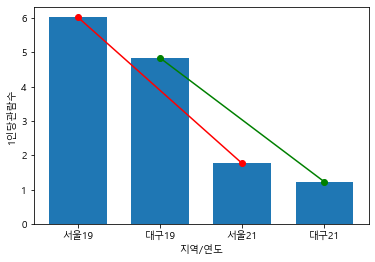

In [670]:
plt.bar(['서울19','대구19','서울21','대구21'],
        [movie19_people_s/pop_sd.iloc[0,0],movie19_people_d/pop_sd.iloc[1,0],
        movie21_people_s/pop_sd.iloc[0,0],movie21_people_d/pop_sd.iloc[1,0]],width=0.7)
plt.ylabel('1인당관람수')                                                 
plt.xlabel('지역/연도')
plt.plot(['서울19','서울21'],[movie19_people_s/pop_sd.iloc[0,0],movie21_people_s/pop_sd.iloc[0,0]] ,'r',
        ['대구19','대구21'],[movie19_people_d/pop_sd.iloc[1,0],movie21_people_d/pop_sd.iloc[1,0]] ,'g')
plt.plot(['서울19','서울21'],[movie19_people_s/pop_sd.iloc[0,0],movie21_people_s/pop_sd.iloc[0,0]] ,'ro',
        ['대구19','대구21'],[movie19_people_d/pop_sd.iloc[1,0],movie21_people_d/pop_sd.iloc[1,0]] ,'go')
plt.show()

In [671]:
#2019, 2021 연간 평균 1인당관람수

# 서울21/서울19
print('서울감소율 : ',100-(round((movie21_people_s/pop_sd.iloc[0,0])/(movie19_people_s/pop_sd.iloc[0,0])*100,2)),'%')
# 대구21/대구19
print('대구감소율 : ',100-(round((movie21_people_d/pop_sd.iloc[1,0])/(movie19_people_d/pop_sd.iloc[1,0])*100,2)),'%')

서울감소율 :  70.7 %
대구감소율 :  74.59 %


### 연간 상영편수

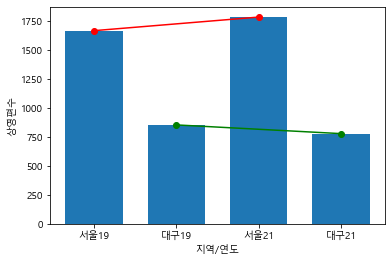

In [672]:
plt.bar(['서울19','대구19','서울21','대구21'],
        [movie19_kind_s,movie19_kind_d,
        movie21_kind_s,movie21_kind_d],width=0.7)
plt.ylabel('상영편수')                                                 
plt.xlabel('지역/연도')
plt.plot(['서울19','서울21'],[movie19_kind_s,movie21_kind_s] ,'r',
        ['대구19','대구21'],[movie19_kind_d,movie21_kind_d] ,'g')
plt.plot(['서울19','서울21'],[movie19_kind_s,movie21_kind_s] ,'ro',
        ['대구19','대구21'],[movie19_kind_d,movie21_kind_d] ,'go')
plt.show()

# 결론2
 
 - 코로나 전후로 서울과 대구 모두 연간 평균 1인당관람수가 크게 감소하였다.
 
 - 서울의 감소율 약 71%, 대구의 감소율 약 75%로 대구가 조금 더 큰 폭으로 감소하였다.
 
 - 코로나 전후로 연간 상영편수는 서울은 오히려 증가하였지만 대구는 감소하였다.
 
 
 ### - 영화 분야의 서울과 대구의 차이는 시설과 같은 양적인 차이가 아닌 상영편수와 같은 질적인 차이로 보인다.
 
 ## 부족한점
 
 - 연간 평균 1인당관람수의 기준을 2020년 하나로 처리해 해당 연도 인구수를 제대로 반영하지 못하였다.
 
 - 연간 영화 상영편수라는 변수하나가 전체 영화의 질적인 수준을 대변하기 힘들다.
 